In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
data=load_breast_cancer()
x,y=data.data,data.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)


In [17]:
model=Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.summary()

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_split=0.2,epochs=50,batch_size=32,verbose=0)


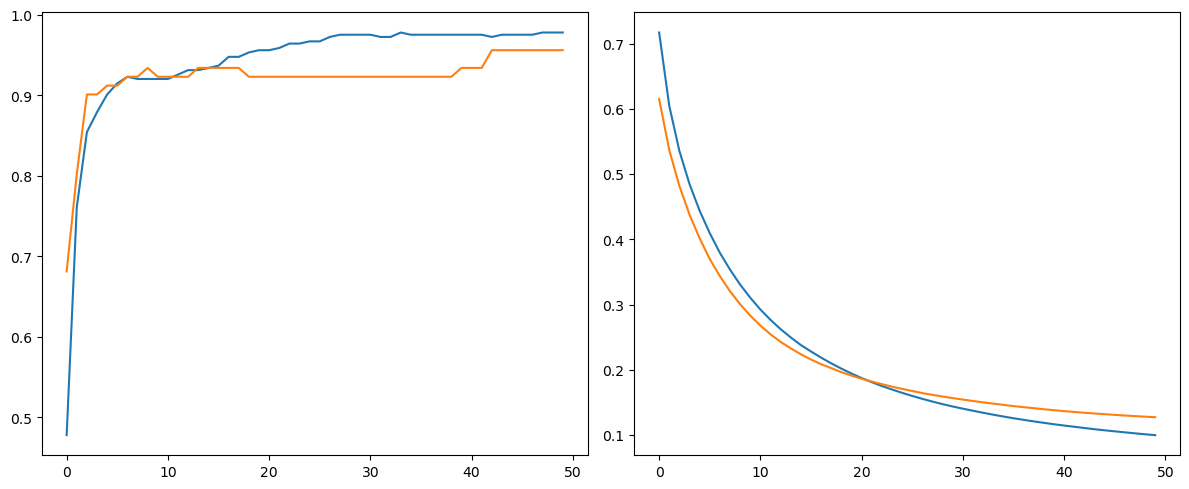

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
plt.tight_layout()
plt.show()

In [24]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(f"test accuracy: {accuracy*100:.2f}")
print(f"test loss:{loss:.4f}")
y_pred_prob=model.predict(x_test)
y_pred=(y_pred_prob>0.5).astype(int).flatten()
print("classification_report")
print(classification_report(y_test,y_pred))

test accuracy: 98.25
test loss:0.0934
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
classification_report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.2600 - loss: 1.4998 - val_accuracy: 0.3200 - val_loss: 1.4303
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3525 - loss: 1.3877 - val_accuracy: 0.3000 - val_loss: 1.3946
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4025 - loss: 1.3178 - val_accuracy: 0.3200 - val_loss: 1.3676
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4575 - loss: 1.2590 - val_accuracy: 0.3200 - val_loss: 1.3484
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4900 - loss: 1.2093 - val_accuracy: 0.3300 - val_loss: 1.3337
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5175 - loss: 1.1643 - val_accuracy: 0.3200 - val_loss: 1.3181
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5400 - loss: 1.1225 - val_accuracy: 0.3200 - val_loss: 1.3079
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5675 - loss: 1.0848 - val_accuracy: 0.3400 - val_loss: 1.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,766 (18.62 KB)

 Trainable params: 1,588 (6.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,178 (12.42 KB)

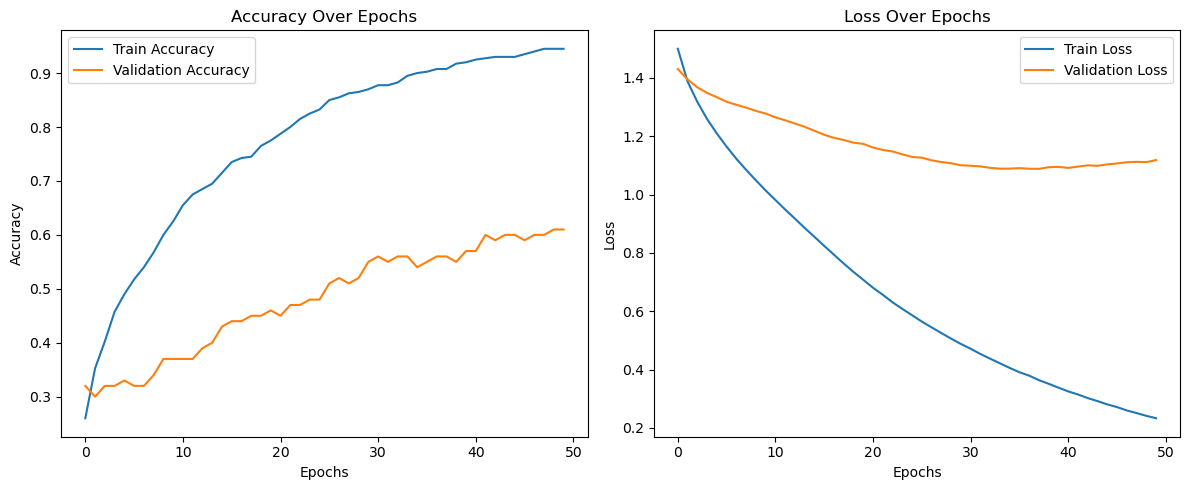


Test Accuracy: 61.00%
Test Loss: 1.1183
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.62      0.62        24
           1       0.61      0.71      0.65        24
           2       0.62      0.48      0.54        27
           3       0.59      0.64      0.62        25

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# 1. Generate synthetic dataset with 4 classes
x, y = make_classification(
    n_samples=500,
    n_features=30,
    n_informative=28,   # make sure sum <= n_features
    n_redundant=2,
    n_classes=4,
    random_state=42
)

# 2. One-hot encode the labels
y_cat = to_categorical(y, num_classes=4)

# 3. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y_cat, test_size=0.2, random_state=42)

# 4. Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 5. Build the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(4, activation='softmax')  # 4 classes -> softmax activation
])

# 6. Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 7. Train the model
history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_test, y_test),
    verbose=1
)

# 8. Print model summary
model.summary()

# 9. Plot accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Loss plot
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

# 10. Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

# 11. Make predictions
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# 12. Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/50


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6225 - loss: 0.6458 - val_accuracy: 0.7300 - val_loss: 0.6074
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7150 - loss: 0.5919 - val_accuracy: 0.7600 - val_loss: 0.5789
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7700 - loss: 0.5514 - val_accuracy: 0.7600 - val_loss: 0.5554
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8075 - loss: 0.5137 - val_accuracy: 0.7800 - val_loss: 0.5348
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8250 - loss: 0.4794 - val_accuracy: 0.8000 - val_loss: 0.5163
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8350 - loss: 0.4475 - val_accuracy: 0.8300 - val_loss: 0.5016
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8475 - loss: 0.4168 - val_accuracy: 0.8100 - val_loss: 0.4890
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8575 - loss: 0.3898 - val_accuracy: 0.8000 - val_loss: 0.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

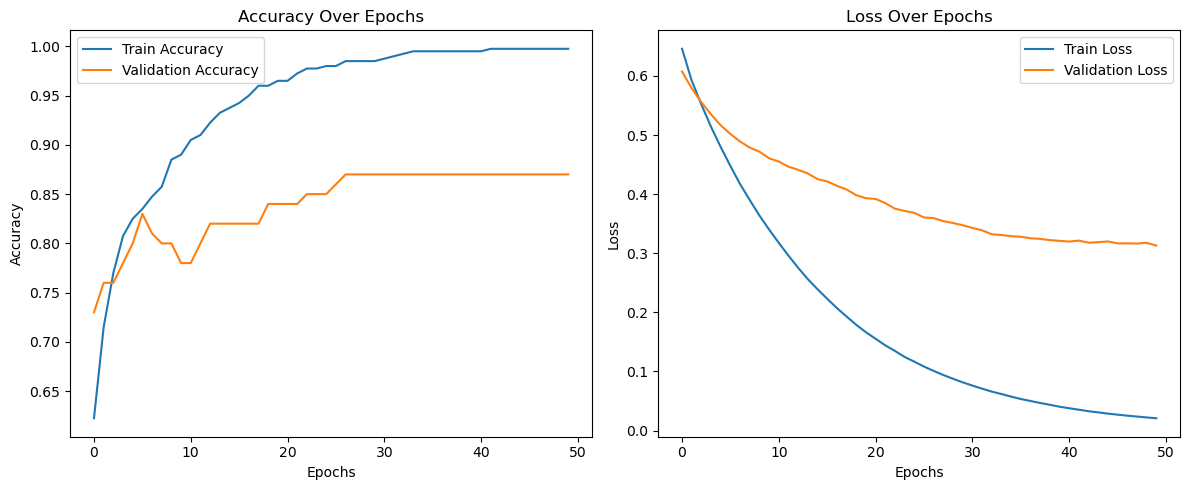

Test accuracy: 87.00%
Test loss: 0.3130
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/stepWARNING:tensorflow:5 out of the last 13 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001A83A49C4A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88        54
           1       0.88  

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate synthetic dataset (for demonstration purposes)
x, y = make_classification(n_samples=500, n_features=30, n_informative=28,n_redundant=2, n_classes=2, random_state=42)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Define the model
model = Sequential([
    Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Model summary
model.summary()

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Train Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Accuracy Over Epochs')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Train Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Loss Over Epochs')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {accuracy * 100:.2f}%")
print(f"Test loss: {loss:.4f}")

# Predict on the test set
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
